# Analyzing Diabetes Dataset with non-missing and scaled data using KMeans 



 Eric Myers

Diabetes dataset has the following columns:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Outcome, which is 1 if the patient is tested positive for diabetes.

---

**Overview of Distribution for each attribute**

In [2]:
import pandas, seaborn

data = pandas.read_csv('../Datasets/diabetes.csv')

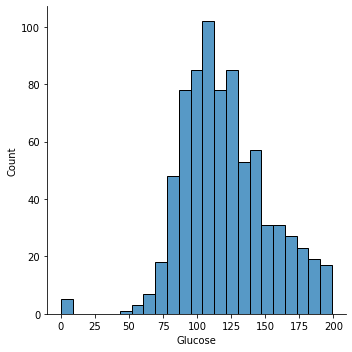

In [3]:
seaborn.displot(data=data, x='Glucose')

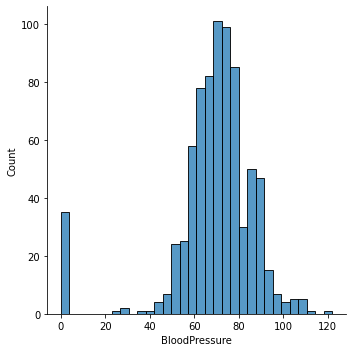

In [4]:
seaborn.displot(data=data, x='BloodPressure')

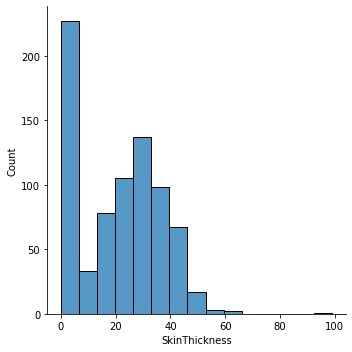

In [10]:
seaborn.displot(data=data, x='SkinThickness')

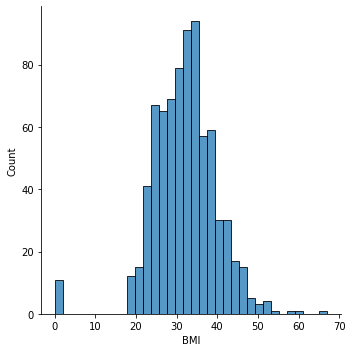

In [11]:
seaborn.displot(data=data, x='BMI')

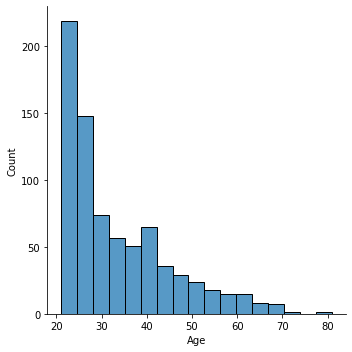

In [12]:
seaborn.displot(data=data, x='Age')

There is quite a few missing data points. Let's get rid of those.

In [5]:
new=(data['Glucose']>0) & (data['BloodPressure']>0) & (data['BMI']>0) & (data['SkinThickness']>0)&(data['Age']>0)

In [6]:
new_data=data[new]

In [7]:
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


**In-depth look into each attribute**

## Glucose

In [8]:
new_data.describe()["Glucose"]

count    532.000000
mean     121.030075
std       30.999226
min       56.000000
25%       98.750000
50%      115.000000
75%      141.250000
max      199.000000
Name: Glucose, dtype: float64

## Blood Pressure

In [9]:
new_data.describe()["BloodPressure"]

count    532.000000
mean      71.505639
std       12.310253
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      110.000000
Name: BloodPressure, dtype: float64

## BMI

In [10]:
new_data.describe()["BMI"]

count    532.000000
mean      32.890226
std        6.881109
min       18.200000
25%       27.875000
50%       32.800000
75%       36.900000
max       67.100000
Name: BMI, dtype: float64

## Skin Thickness

In [11]:
new_data.describe()["SkinThickness"]

count    532.000000
mean      29.182331
std       10.523878
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

## Age

In [12]:
new_data.describe()["Age"]

count    532.000000
mean      31.614662
std       10.761584
min       21.000000
25%       23.000000
50%       28.000000
75%       38.000000
max       81.000000
Name: Age, dtype: float64

---


**Showing the distribution of BMI values**

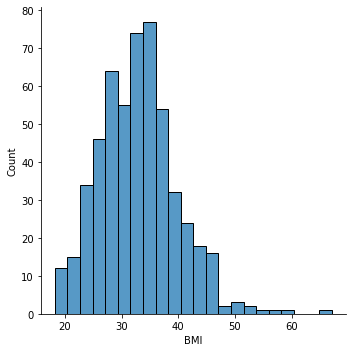

In [49]:
seaborn.displot(data=new_data, x='BMI')

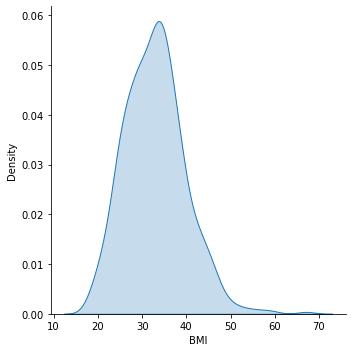

In [13]:
seaborn.displot(data=new_data, x='BMI', kind='kde', fill=True)

In [14]:
new_data['BMI'].describe()

count    532.000000
mean      32.890226
std        6.881109
min       18.200000
25%       27.875000
50%       32.800000
75%       36.900000
max       67.100000
Name: BMI, dtype: float64

The distribution is almost normal, but leans a little to the left. It seems that most BMI's lie between 25-40, with a few outliers 

---



**The range of BMI's for the middle 50% (from 25%-75% of BMI values) of the patients in this data**

In [66]:
new_data['BMI'].quantile(0.75)

36.9

In [67]:
BMI_data=(new_data['BMI'].quantile(0.25)<=new_data['BMI']) & (new_data["BMI"]<=new_data['BMI'].quantile(0.75))

In [68]:
BMI_dat=new_data[BMI_data]
BMI_dat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0


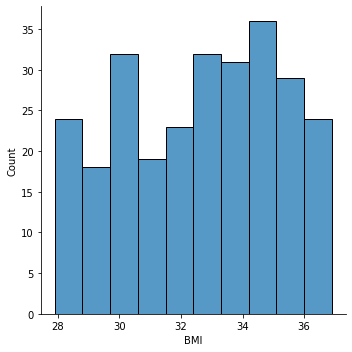

In [69]:
seaborn.displot(data=BMI_dat, x='BMI')

In [70]:
BMI_dat['BMI'].max()


36.9

In [71]:
BMI_dat['BMI'].min()

27.9

Between these two numbers, the 25% and 75%, is the middle 50% of the data, which is selected above

---

**Rescaling the data using MinMaxScaler**

These 5 features don't have the same scales. Distance-based machine learning methods require the features to be of the same scales. Otherwise, the differences in scales emphasize one feature over in an uncontrolled fashion. Because of this, we have to rescale the data.

In [74]:
new_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,114.988722,32.890226,0.502966,31.614662,0.332707
std,3.312036,30.999226,12.310253,10.523878,123.007555,6.881109,0.344546,10.761584,0.471626
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,0.000000,27.875000,0.258750,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,91.500000,32.800000,0.416000,28.000000,0.000000
75%,5.000000,141.250000,80.000000,36.000000,165.250000,36.900000,0.658500,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(new_data)

In [18]:
data_scaled

array([[0.35294118, 0.64335664, 0.55813953, ..., 0.23211991, 0.48333333,
        1.        ],
       [0.05882353, 0.2027972 , 0.48837209, ..., 0.11391863, 0.16666667,
        0.        ],
       [0.05882353, 0.23076923, 0.48837209, ..., 0.03511777, 0.        ,
        0.        ],
       ...,
       [0.11764706, 0.46153846, 0.53488372, ..., 0.10920771, 0.1       ,
        0.        ],
       [0.29411765, 0.45454545, 0.55813953, ..., 0.06852248, 0.15      ,
        0.        ],
       [0.05882353, 0.25874126, 0.53488372, ..., 0.09850107, 0.03333333,
        0.        ]])

In [7]:
data_scaled = pandas.DataFrame(data_scaled, columns=[
  'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
    'Age', 'Outcome'])

In [76]:
data_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.643357,0.558140,0.304348,0.000000,0.314928,0.232120,0.483333,1.0
1,0.058824,0.202797,0.488372,0.239130,0.000000,0.171779,0.113919,0.166667,0.0
2,0.058824,0.230769,0.488372,0.173913,0.111111,0.202454,0.035118,0.000000,0.0
3,0.000000,0.566434,0.186047,0.304348,0.198582,0.509202,0.943469,0.200000,1.0
4,0.176471,0.153846,0.302326,0.271739,0.104019,0.261759,0.069807,0.083333,1.0
...,...,...,...,...,...,...,...,...,...
527,0.529412,0.797203,0.581395,0.260870,0.000000,0.527607,0.136188,0.366667,1.0
528,0.588235,0.314685,0.604651,0.445652,0.212766,0.300613,0.036831,0.700000,0.0
529,0.117647,0.461538,0.534884,0.217391,0.000000,0.380368,0.109208,0.100000,0.0
530,0.294118,0.454545,0.558140,0.173913,0.132388,0.163599,0.068522,0.150000,0.0


In [77]:
melted_data=data_scaled.melt()

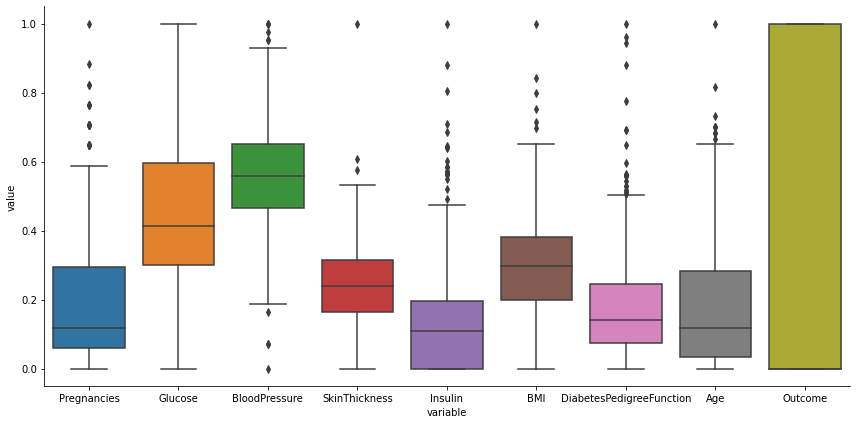

In [80]:
seaborn.catplot(data=melted_data, x='variable', y='value', kind='box', height=6, aspect=2)

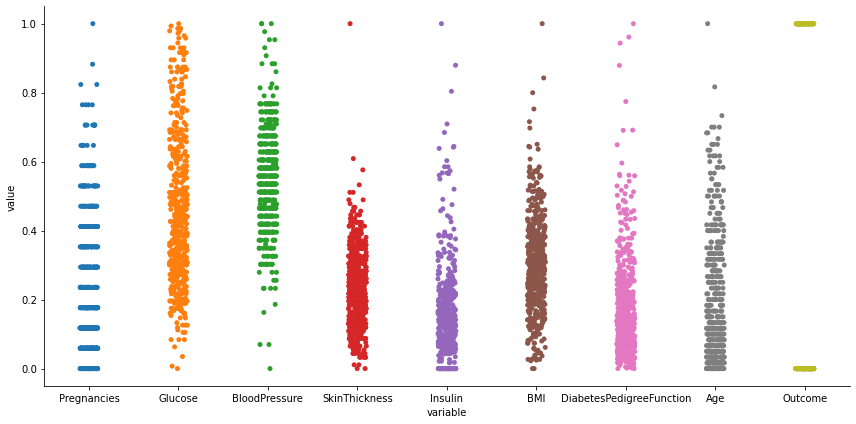

In [81]:
seaborn.catplot(data=melted_data, x='variable', y='value', height=6, aspect=2)

In [84]:
data_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.206877,0.454756,0.552391,0.241112,0.135920,0.300414,0.179000,0.176911,0.332707
std,0.194826,0.216778,0.143142,0.114390,0.145399,0.140718,0.147557,0.179360,0.471626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.298951,0.465116,0.163043,0.000000,0.197853,0.074411,0.033333,0.000000
50%,0.117647,0.412587,0.558140,0.239130,0.108156,0.298569,0.141756,0.116667,0.000000
75%,0.294118,0.596154,0.651163,0.315217,0.195331,0.382413,0.245610,0.283333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Above is the differences between the mean, and middle 50% range for each attribute

---

**Comparing the distributions/5-point statistics of the features rescaled using MinMaxScaler and StandardScaler.**


For the MinMaxScaler data, we have the above graph

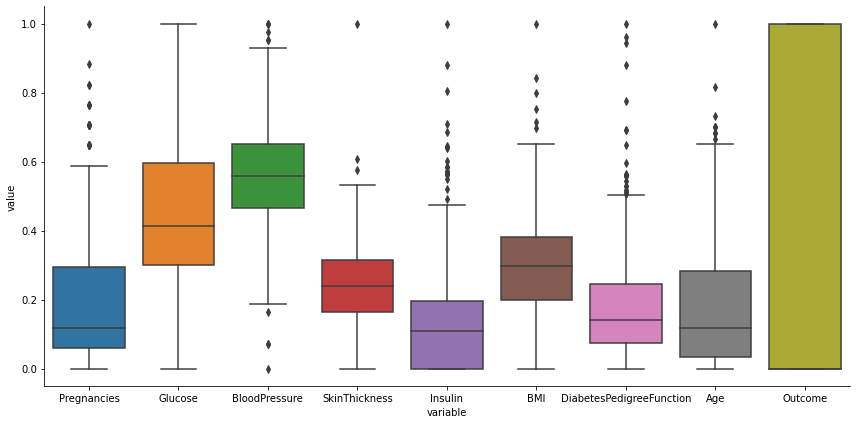

In [85]:
seaborn.catplot(data=melted_data, x='variable', y='value', kind='box', height=6, aspect=2)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standard_scaled = scaler.fit_transform(new_data)

In [87]:
data_standard_scaled = pandas.DataFrame(data_standard_scaled, columns=[
  'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
    'Age', 'Outcome'])

In [88]:
data_standard_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.750421,0.870838,0.040196,0.553327,-0.935690,0.103245,0.360331,1.710031,1.41621
1,-0.760646,-1.163383,-0.447661,-0.017342,-0.935690,-0.914990,-0.441477,-0.057170,-0.70611
2,-0.760646,-1.034227,-0.447661,-0.588010,-0.170790,-0.696797,-0.976015,-0.987276,-0.70611
3,-1.062859,0.515657,-2.561709,0.553327,0.431365,1.485136,5.185701,0.128851,1.41621
4,-0.156219,-1.389408,-1.748614,0.267993,-0.219614,-0.274956,-0.740702,-0.522223,1.41621
...,...,...,...,...,...,...,...,...,...
527,1.657060,1.581201,0.202815,0.172881,-0.935690,1.616052,-0.290412,1.058957,1.41621
528,1.959274,-0.646756,0.365434,1.789776,0.529012,0.001422,-0.964395,2.919169,-0.70611
529,-0.458433,0.031318,-0.122423,-0.207565,-0.935690,0.568724,-0.473433,-0.429212,-0.70611
530,0.448207,-0.000971,0.040196,-0.588010,-0.024320,-0.973175,-0.749417,-0.150181,-0.70611


In [90]:
melted_standard_data=data_standard_scaled.melt()

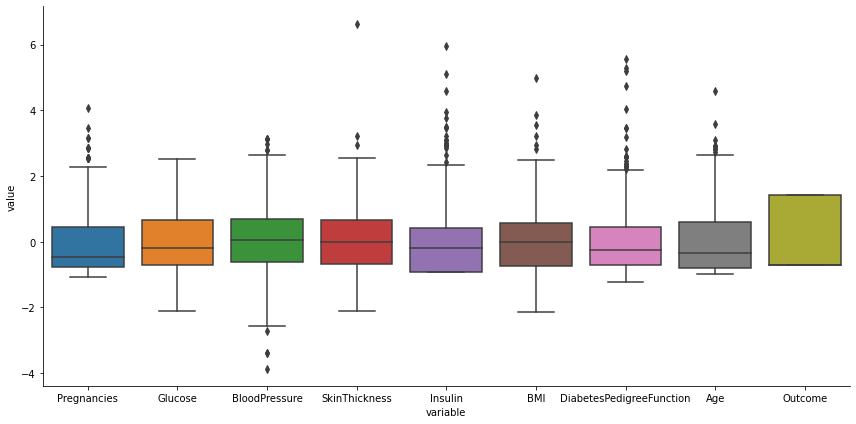

In [91]:
seaborn.catplot(data=melted_standard_data, x='variable', y='value', kind='box', height=6, aspect=2)

---
Using Kmeans to cluster the data into 2 clusters, using features scaled with MinMaxScaler.


In [19]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(new_data)
data_scaled = pandas.DataFrame(data_scaled, columns=[
  'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
    'Age', 'Outcome'])

In [20]:

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(data_scaled)


KMeans(n_clusters=2)

In [21]:
data_scaled['km2']=km.labels_

In [22]:
data_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,km2
0,0.352941,0.643357,0.558140,0.304348,0.000000,0.314928,0.232120,0.483333,1.0,0
1,0.058824,0.202797,0.488372,0.239130,0.000000,0.171779,0.113919,0.166667,0.0,1
2,0.058824,0.230769,0.488372,0.173913,0.111111,0.202454,0.035118,0.000000,0.0,1
3,0.000000,0.566434,0.186047,0.304348,0.198582,0.509202,0.943469,0.200000,1.0,0
4,0.176471,0.153846,0.302326,0.271739,0.104019,0.261759,0.069807,0.083333,1.0,0
...,...,...,...,...,...,...,...,...,...,...
527,0.529412,0.797203,0.581395,0.260870,0.000000,0.527607,0.136188,0.366667,1.0,0
528,0.588235,0.314685,0.604651,0.445652,0.212766,0.300613,0.036831,0.700000,0.0,1
529,0.117647,0.461538,0.534884,0.217391,0.000000,0.380368,0.109208,0.100000,0.0,1
530,0.294118,0.454545,0.558140,0.173913,0.132388,0.163599,0.068522,0.150000,0.0,1


Getting the data from the indexes that only exist in the scaled data frame.


In [25]:
new_data_index=data_scaled.loc[data.index.intersection(data_scaled.index)]

In [26]:
new_data_index

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,km2
0,0.352941,0.643357,0.558140,0.304348,0.000000,0.314928,0.232120,0.483333,1.0,0
1,0.058824,0.202797,0.488372,0.239130,0.000000,0.171779,0.113919,0.166667,0.0,1
2,0.058824,0.230769,0.488372,0.173913,0.111111,0.202454,0.035118,0.000000,0.0,1
3,0.000000,0.566434,0.186047,0.304348,0.198582,0.509202,0.943469,0.200000,1.0,0
4,0.176471,0.153846,0.302326,0.271739,0.104019,0.261759,0.069807,0.083333,1.0,0
...,...,...,...,...,...,...,...,...,...,...
527,0.529412,0.797203,0.581395,0.260870,0.000000,0.527607,0.136188,0.366667,1.0,0
528,0.588235,0.314685,0.604651,0.445652,0.212766,0.300613,0.036831,0.700000,0.0,1
529,0.117647,0.461538,0.534884,0.217391,0.000000,0.380368,0.109208,0.100000,0.0,1
530,0.294118,0.454545,0.558140,0.173913,0.132388,0.163599,0.068522,0.150000,0.0,1


Adding Outcome to scaled data that corresponds with indexes from original data

In [27]:
data_scaled['outcome']=new_data_index['Outcome']

In [28]:
data_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,km2,outcome
0,0.352941,0.643357,0.558140,0.304348,0.000000,0.314928,0.232120,0.483333,1.0,0,1.0
1,0.058824,0.202797,0.488372,0.239130,0.000000,0.171779,0.113919,0.166667,0.0,1,0.0
2,0.058824,0.230769,0.488372,0.173913,0.111111,0.202454,0.035118,0.000000,0.0,1,0.0
3,0.000000,0.566434,0.186047,0.304348,0.198582,0.509202,0.943469,0.200000,1.0,0,1.0
4,0.176471,0.153846,0.302326,0.271739,0.104019,0.261759,0.069807,0.083333,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
527,0.529412,0.797203,0.581395,0.260870,0.000000,0.527607,0.136188,0.366667,1.0,0,1.0
528,0.588235,0.314685,0.604651,0.445652,0.212766,0.300613,0.036831,0.700000,0.0,1,0.0
529,0.117647,0.461538,0.534884,0.217391,0.000000,0.380368,0.109208,0.100000,0.0,1,0.0
530,0.294118,0.454545,0.558140,0.173913,0.132388,0.163599,0.068522,0.150000,0.0,1,0.0


In [33]:
data_scaled[data_scaled["outcome"]==0].mean()

Pregnancies                 0.172162
Glucose                     0.377741
BloodPressure               0.533868
SkinThickness               0.220545
Insulin                     0.114154
BMI                         0.270544
DiabetesPedigreeFunction    0.154739
Age                         0.137042
Outcome                     0.000000
km2                         1.000000
outcome                     0.000000
dtype: float64

In [34]:
len(data_scaled[data_scaled["outcome"]==0])

355

In [35]:
data_scaled[data_scaled["outcome"]==1].mean()

Pregnancies                 0.276504
Glucose                     0.609221
BloodPressure               0.589541
SkinThickness               0.282363
Insulin                     0.179576
BMI                         0.360323
DiabetesPedigreeFunction    0.227661
Age                         0.256874
Outcome                     1.000000
km2                         0.000000
outcome                     1.000000
dtype: float64

In [36]:
len(data_scaled[data_scaled["outcome"]==1])

177

In [37]:
data_scaled[data_scaled["km2"]==0].mean()

Pregnancies                 0.276504
Glucose                     0.609221
BloodPressure               0.589541
SkinThickness               0.282363
Insulin                     0.179576
BMI                         0.360323
DiabetesPedigreeFunction    0.227661
Age                         0.256874
Outcome                     1.000000
km2                         0.000000
outcome                     1.000000
dtype: float64

In [39]:
len(data_scaled[data_scaled["km2"]==0])

177

In [219]:
data_scaled[data_scaled["km2"]==1].mean()

Pregnancies                 0.276504
Glucose                     0.609221
BloodPressure               0.589541
SkinThickness               0.282363
Insulin                     0.179576
BMI                         0.360323
DiabetesPedigreeFunction    0.227661
Age                         0.256874
Outcome                     1.000000
km2                         1.000000
outcome                     1.000000
km4                         2.429379
dtype: float64

In [40]:
len(data_scaled[data_scaled["km2"]==1])

355

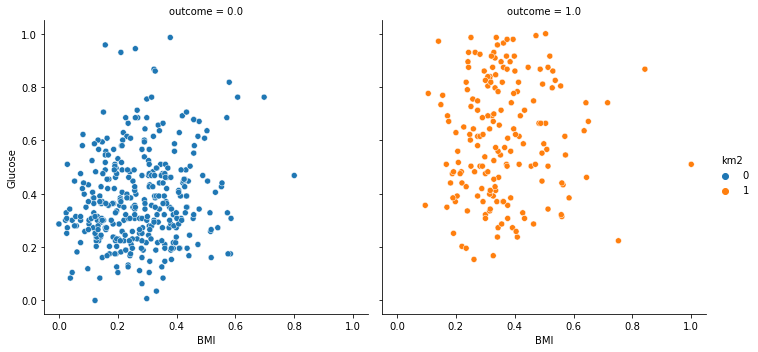

In [241]:
seaborn.relplot(data=data_scaled, x="BMI", y="Glucose", hue='km2', col='outcome')

**The clusters and Outcome overlap. Outcomes with a value of 1 are in cluster one, and Outcomes with a value of 0 are in cluster 0**

---

**Problem 7**

Using silhouette as the scoring method on Kmeans, determine the best number of clusters.

Create a new column called "km_opt" on your scaled features data frame to store the cluster labels.

Do the two clusters and two Outcome groups (0 and 1) overlap?

Report the counts and average values in each cluster in each group. 

Visualize (relplot on some 2 selected features) the data in the cluster-Outcome combinations. To see the combinations clearly use hue, col, row in relplot.


In [202]:
from sklearn.metrics import silhouette_score

for k in range(2, 20):
    model = KMeans(n_clusters=k)
    model.fit(data_scaled)
    score = silhouette_score(data_scaled, model.labels_).round(2)
    print(k, score)

2 0.59
3 0.65
4 0.76
5 0.46
6 0.36
7 0.34
8 0.26
9 0.2
10 0.19
11 0.2
12 0.17
13 0.18
14 0.17
15 0.17
16 0.16
17 0.15
18 0.15
19 0.16


In [41]:
model = KMeans(n_clusters=4)
model.fit(data_scaled)
data_scaled['km4'] = model.labels_
data_scaled.groupby(['Outcome','km4']).mean()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Outcome km4                                                                  
0.0     0       0.107128  0.357664       0.508615       0.207871  0.113574   
        3       0.392157  0.445653       0.619294       0.263419  0.116117   
1.0     1       0.111241  0.614069       0.564126       0.284869  0.192250   
        2       0.496130  0.602779       0.623317       0.279033  0.162732   

                  BMI  DiabetesPedigreeFunction       Age  km2  outcome  
Outcome km4                                                              
0.0     0    0.263013                  0.153513  0.064781  1.0      0.0  
        3    0.296019                  0.158887  0.381481  1.0      0.0  
1.0     1    0.373788                  0.231581  0.145710  0.0      1.0  
        2    0.342428                  0.222450  0.404605  0.0      1.0

In [46]:
data_scaled.groupby(['Outcome', 'km4']).count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome km4                                                                     
0.0     0            274      274            274            274      274  274   
        3             81       81             81             81       81   81   
1.0     1            101      101            101            101      101  101   
        2             76       76             76             76       76   76   

             DiabetesPedigreeFunction  Age  km2  outcome  
Outcome km4                                               
0.0     0                         274  274  274      274  
        3                          81   81   81       81  
1.0     1                         101  101  101      101  
        2                          76   76   76       76

In [58]:
data_scaled.var()

Pregnancies                 0.037957
Glucose                     0.046993
BloodPressure               0.020490
SkinThickness               0.013085
Insulin                     0.021141
BMI                         0.019802
DiabetesPedigreeFunction    0.021773
Age                         0.032170
Outcome                     0.222431
km2                         0.222431
outcome                     0.222431
km4                         1.264715
dtype: float64

Glucose has high variance. Let's see if there is any correlation between the clusters.

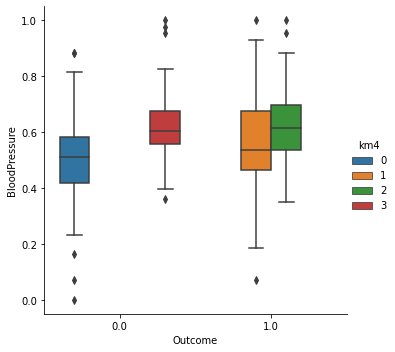

In [60]:
seaborn.catplot(data=data_scaled, x='Outcome', y='BloodPressure', hue='km4', kind="box")

It looks like the data is clustered slightly according to Glucose. Those with higher Glucose and an outcome of 0 are in cluster 3, and those with higher Glucose and an outcome of 1 are in cluster 2

In [50]:
data_scaled.var()

Pregnancies                 0.037957
Glucose                     0.046993
BloodPressure               0.020490
SkinThickness               0.013085
Insulin                     0.021141
BMI                         0.019802
DiabetesPedigreeFunction    0.021773
Age                         0.032170
Outcome                     0.222431
km2                         0.222431
outcome                     0.222431
km4                         1.264715
dtype: float64

Pregnancies also  has high variance. Let's see if there is a correlation between the clusters

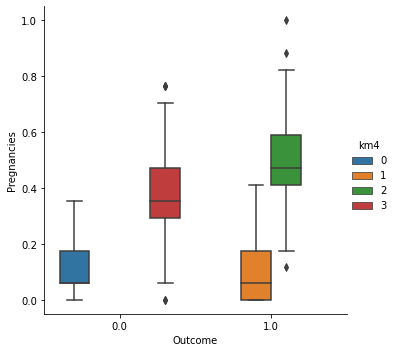

In [57]:
seaborn.catplot(data=data_scaled, x='Outcome', y="Pregnancies", hue='km4', kind="box")

It looks like the two Outcomes are further split amongst them by how many pregnancies are in each cluster. For those with an outcome of 0, if there was a higher number of pregnancies, they fall into cluster 3. If not, they are in cluster 0. For those with an outcome of 1, if there is a high number of pregnancies, they fall into cluster 2. If lower, cluster 1. 